
Instalacion de python

Salte este paso si ya lo tiene


```bahs
sudo apt update/
sudo apt upgrade/
sudo apt install python3
##verifique que python esta instalado con 
python3 --version


## si no tiene jupyter instalado

pip install notebook
```

Creacion de un entorno Virtual 

Si nunca ha creado un entorni virtual utilice las sigueintes instruciones:

-abra la consola o presione ctrl+alt+t)

-ingrese el comando

```bash
python -m venv minitaller
## si genera algun error
apt install python3.10-venv

## Ahora introduzca
pwd
## copie la direccion con ctrl+shift+c
source <pwd>/minitaller/bin/activate


```
Clone el repositorio 

```bash
git init/
git clone https://github.com/brnm9801/mintaller.git
```

Ejecute el archivo requirements.txt

```bash
pip install -r requirements.txt

##Verifique que todo se instalo bien revisando el archivo
cat requirements.txt
```




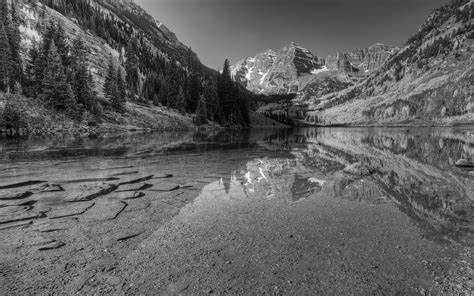

In [13]:
import cv2
import numpy as np
#!pip install matplotlib 
from IPython.display import display, Image
from IPython.display import Video


# Cargar la imagen
image = cv2.imread("sample.jpeg")

# Mostrar la imagen
cv2.imshow('Imagen de Paisaje', image)
display(Image(filename='sample.jpeg'))


## si muestar error use $ sudo apt install libgtk2.0-dev pkg-config

## si muestar el error <cvShowImage> use https://chatgpt.com/share/66e92357-9c98-8003-ba62-6dad90257e8e


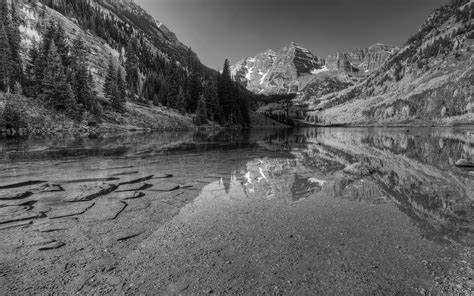

In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Guardar la imagen en escala de grises
cv2.imwrite('sample_gray.jpeg', gray_image)
display(Image(filename='sample_gray.jpeg'))

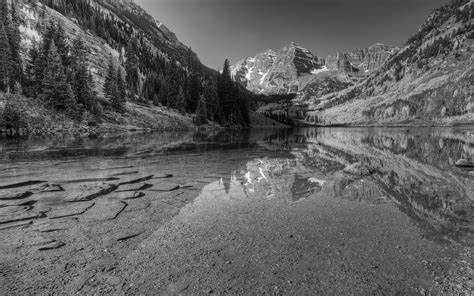

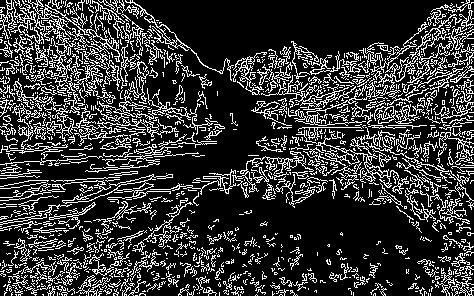

In [15]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)
cv2.imwrite('sample-edge.jpeg', edges)

display(Image(filename='sample.jpeg'))
display(Image(filename='sample-edge.jpeg'))



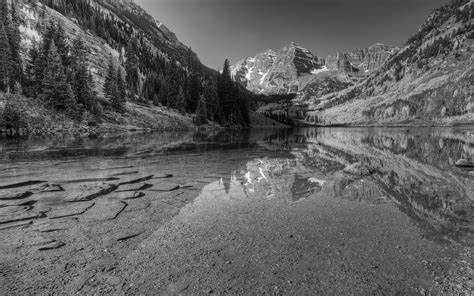

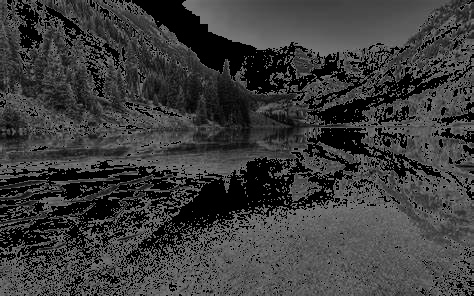

In [16]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray_image, 120, 255, cv2.THRESH_BINARY_INV)
background = cv2.bitwise_and(image, image, mask=thresh)
cv2.imwrite('sample-fondo.jpeg', background )
display(Image(filename='sample.jpeg'))
display(Image(filename='sample-fondo.jpeg'))
cv2.imshow("sfwr",background)

In [17]:
### si tiene disponible camara, no usar en jupyter
##cap = cv2.VideoCapture(0)
## si no se tiene camara
cap = cv2.VideoCapture('istockphoto-1766316527-640_adpp_is.mp4')

video_path = 'istockphoto-1766316527-640_adpp_is.mp4'

# Muestra el video en el notebook
Video(video_path, embed=True)


In [18]:

##Carga 
## Si uso pip /usr/local/lib/python3.x/dist-packages/cv2/data/haarcascades/haarcascade_frontalface_default.xml
## si recompilo opencv /path/donde/recompilo/opencv/data/haarcascades/haarcascade_frontalface_default.xml
##cap = cv2.VideoCapture(0)
face_classifier = cv2.CascadeClassifier('/home/brnm/Documents/minitaller/opencv/data/haarcascades/haarcascade_frontalface_default.xml')
while True:
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.GaussianBlur(gray, (15, 15), 0)
    faces = face_classifier.detectMultiScale(blurred_image, scaleFactor=1.1, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('Face Detection', frame)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()